In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
Time_array = []
x_axis = []
Ping_array = []
Download_array = []
Upload_array = []

In [4]:
with open("results.txt", "r", encoding = "UTF-16") as file:
    date_time = file.readline()
    while(len(date_time)) > 0 :
        addition = 0
        Time_array.append(date_time[11:len(date_time)-1])
        if date_time[19:len(date_time)-1] == "PM" :
            addition = 12
        time = date_time.split(' ')[1].split(':')
        x_axis.append(int(time[0])+addition +  int(time[1])/60)
        Ping_array.append(float(file.readline()))
        Download_array.append(float(file.readline()))
        Upload_array.append(float(file.readline()))
        date_time = file.readline()

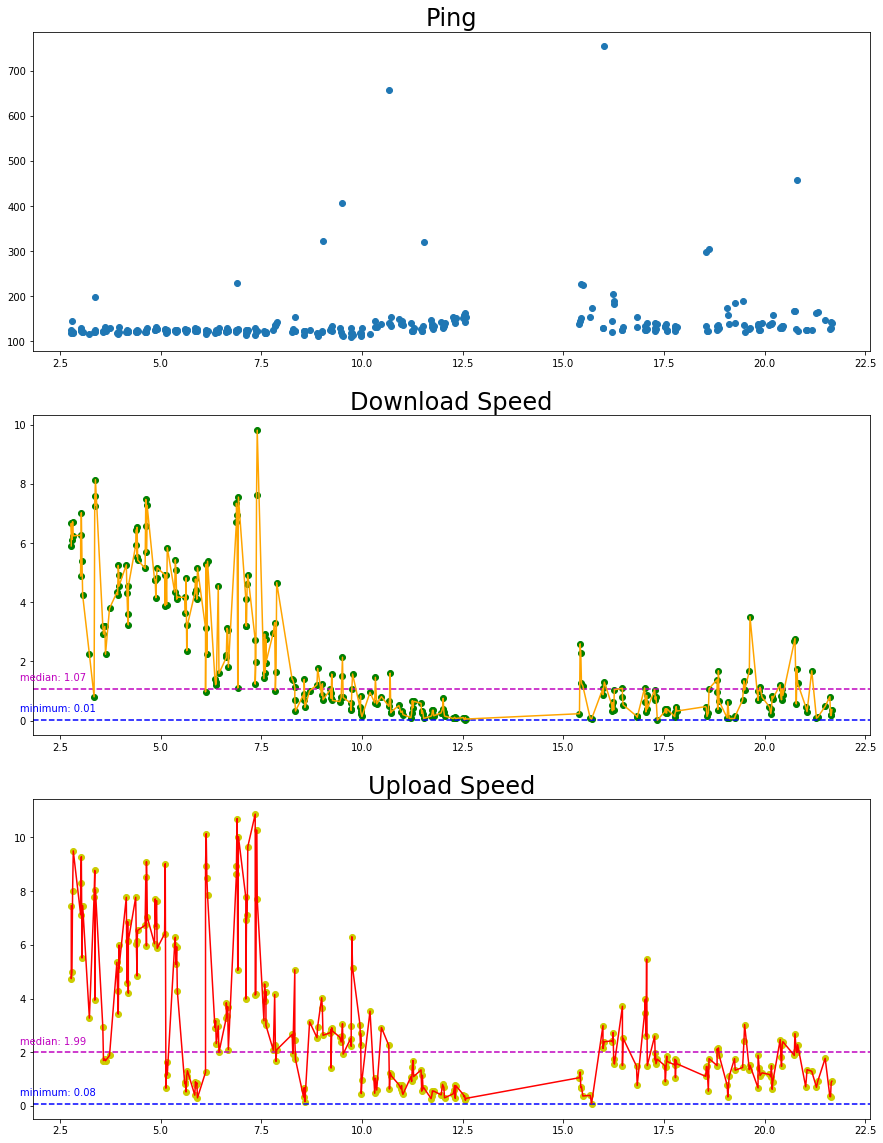

In [23]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize = (15,20))

ax1.set_title("Ping", {'fontsize': 24})
ax1.scatter(x_axis, Ping_array)

ax2.set_title("Download Speed", {'fontsize': 24})
minimum_download = np.array(Download_array).min()
ax2.axhline(y = minimum_download, linestyle = '--', color='b')
ax2.text(1.5, minimum_download + 0.3, "minimum: {}".format(minimum_download), color='b')
median_download = np.median(np.array(Download_array))
ax2.axhline(y = median_download, linestyle = '--', color='m')
ax2.text(1.5, median_download + 0.3, "median: {}".format(median_download), color='m')
ax2.scatter(x_axis, Download_array, color='green', marker='o')
ax2.plot(x_axis, Download_array, color='orange')

minimum_upload = np.array(Upload_array).min()
ax3.axhline(y = minimum_upload, linestyle = '--', color='b')
ax3.text(1.5, minimum_upload + 0.3, "minimum: {}".format(minimum_upload), color='b')
median_upload = np.median(np.array(Upload_array))
ax3.axhline(y = median_upload, linestyle = '--', color='m')
ax3.text(1.5, median_upload + 0.3, "median: {}".format(median_upload), color='m')
ax3.set_title("Upload Speed", {'fontsize': 24})
ax3.scatter(x_axis, Upload_array, color='#cccc00', marker='o')
ax3.plot(x_axis, Upload_array, color='red')
